# Demo
* Data pre-processing

* Nearest neighbors based classification

In [1]:
# Import the commonly-used modules
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [2]:
# size of the data
print("(row, column):",data.shape)

(row, column): (891, 12)


In [3]:
# check for missing values
data.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass           0
Survived         0
dtype: int64

In [4]:
# one option is to just simply drop rows with any missing values
data_no_missing_value=data.dropna()
print("(row, column) after dropping missing values:\n",data_no_missing_value.shape)

(row, column) after dropping missing values:
 (183, 12)


In [5]:
# get one column from the data
data_name=data_no_missing_value["Name"]
data_name

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 183, dtype: object

In [6]:
# get three columns from the data
data_sex_age_survived=data_no_missing_value[['Sex', 'Age', 'Survived']]
data_sex_age_survived

,Sex,Age,Survived
1,female,38.0,1
3,female,35.0,1
6,male,54.0,0
10,female,4.0,1
11,female,58.0,1
...,...,...,...
871,female,47.0,1
872,male,33.0,0
879,female,56.0,1
887,female,19.0,1


In [7]:
# encode categorical attributes
data_sex_age_survived['Sex']=data_sex_age_survived.Sex.astype('category').cat.codes
data_sex_age_survived

<ipython-input-7-9aac392383e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sex_age_survived['Sex']=data_sex_age_survived.Sex.astype('category').cat.codes


,Sex,Age,Survived
1,0,38.0,1
3,0,35.0,1
6,1,54.0,0
10,0,4.0,1
11,0,58.0,1
...,...,...,...
871,0,47.0,1
872,1,33.0,0
879,0,56.0,1
887,0,19.0,1


In [8]:
# define X and y
feature_columns=['Sex', 'Age']
X=data_sex_age_survived[feature_columns]
y=data_sex_age_survived.Survived
print(X.head())
print(y.head())

    Sex   Age
1     0  38.0
3     0  35.0
6     1  54.0
10    0   4.0
11    0  58.0
1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64


In [9]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
# train a NN classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
# predict the test data
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0], dtype=int64)

In [12]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7608695652173914


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred=clf.predict(X_test)
y_pred

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7608695652173914


# Task 1: Build a k-NN classifier

In [16]:
# Load the dataset
data = pd.read_csv("titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [17]:
# delete the attribute "Cabin"
del data['Cabin']

In [18]:
# fill missing values with the mean age
print("The mean age: ", data.Age.mean())



The mean age:  29.69911764705882


In [19]:
# drop rows with any missing values (the "Embarked" atrribute)
data_no_missing_value=data.dropna()
print("(row, column) after dropping missing values:\n",data_no_missing_value.shape)


(row, column) after dropping missing values:
 (712, 11)


A question: Are "PassengerId", "Name" and "Ticket" suitable for being a feature?


In [20]:
# Select all other attributes to form a data set
data=data_no_missing_value[['Survived','PassengerId','Name','SibSp','Ticket','Fare','Embarked']]
data

,Survived,PassengerId,Name,SibSp,Ticket,Fare,Embarked
0,0,1,"Braund, Mr. Owen Harris",1,A/5 21171,7.2500,S
1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,7.9250,S
3,1,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,113803,53.1000,S
4,0,5,"Allen, Mr. William Henry",0,373450,8.0500,S
...,...,...,...,...,...,...,...
885,0,886,"Rice, Mrs. William (Margaret Norton)",0,382652,29.1250,Q
886,0,887,"Montvila, Rev. Juozas",0,211536,13.0000,S
887,1,888,"Graham, Miss. Margaret Edith",0,112053,30.0000,S
889,1,890,"Behr, Mr. Karl Howell",0,111369,30.0000,C


In [21]:
# encode the categorical attributes where applicable
data['Name']=data.Name.astype('category').cat.codes
data['Ticket']=data.Ticket.astype('category').cat.codes
data['Embarked']=data.Embarked.astype('category').cat.codes
data['Fare']=data.Fare.astype('category').cat.codes
data

<ipython-input-21-1c7e6f811f25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name']=data.Name.astype('category').cat.codes
<ipython-input-21-1c7e6f811f25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ticket']=data.Ticket.astype('category').cat.codes
<ipython-input-21-1c7e6f811f25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Survived,PassengerId,Name,SibSp,Ticket,Fare,Embarked
0,0,1,103,1,407,16,2
1,1,2,179,1,470,180,0
2,1,3,317,0,531,32,2
3,1,4,247,1,39,163,2
4,0,5,15,0,372,34,2
...,...,...,...,...,...,...,...
885,0,886,556,0,376,128,1
886,0,887,460,0,82,72,2
887,1,888,274,0,12,130,2
889,1,890,80,0,8,130,0


In [22]:
# build a 1-NN classification model where "Survived" is the prediction target
feature_columns=['PassengerId','Name','SibSp','Ticket','Fare','Embarked']
X=data[feature_columns]
y=data.Survived
print(X.head())
print(y.head())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

   PassengerId  Name  SibSp  Ticket  Fare  Embarked
0            1   103      1     407    16         2
1            2   179      1     470   180         0
2            3   317      0     531    32         2
3            4   247      1      39   163         2
4            5    15      0     372    34         2
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
0.6067415730337079


# Task 2 Tune the hyper parameters


r2 scores for different alpha values:  [0.6067415730337079, 0.6460674157303371, 0.6235955056179775, 0.6067415730337079]


Text(0.5, 1.0, 'r2 scores at different alpha values')

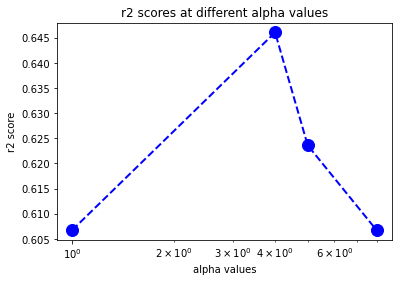

In [32]:
# mannually try other k values, e.g., 2, 3, 5, 10, the accuracy comparison
from sklearn import neighbors
r2_scores = []
k_neighbors = [1,4,5,8]
for neighbor in k_neighbors:
    clf = neighbors.KNeighborsClassifier(neighbor)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    y_pred
    accuracy=(metrics.accuracy_score(y_test, y_pred))
    r2_scores.append(accuracy)
print("r2 scores for different alpha values: ", r2_scores)
import matplotlib.pyplot as plt
plt.plot(k_neighbors, r2_scores, color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xscale('log')
plt.xlabel('alpha values')
plt.ylabel('r2 score')
plt.title('r2 scores at different alpha values')


In [33]:
# use k-fold cross-validation (10-fold cross validation)
from sklearn.model_selection import cross_val_score
(cross_val_score(clf, X, y, cv=10))


array([0.58333333, 0.59722222, 0.74647887, 0.67605634, 0.54929577,
       0.66197183, 0.73239437, 0.70422535, 0.66197183, 0.71830986])

In [ ]:
# Use grid search to faciliate the identification of the best hyper parameter
from sklearn.model_selection import GridSearchCV


# Task 3 Build a decision tree model for the above classification task

[Text(224.14521028037385, 211.4, 'X[4] <= 161.5\ngini = 0.482\nsamples = 712\nvalue = [424, 288]'),
 Text(147.32242990654206, 199.32, 'X[4] <= 58.5\ngini = 0.445\nsamples = 584\nvalue = [389, 195]'),
 Text(67.50105140186916, 187.24, 'X[3] <= 521.5\ngini = 0.316\nsamples = 239\nvalue = [192, 47]'),
 Text(40.35070093457944, 175.16, 'X[5] <= 1.5\ngini = 0.295\nsamples = 228\nvalue = [187, 41]'),
 Text(10.951401869158879, 163.07999999999998, 'X[0] <= 51.5\ngini = 0.432\nsamples = 38\nvalue = [26, 12]'),
 Text(8.865420560747664, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(13.037383177570094, 151.0, 'X[3] <= 160.5\ngini = 0.401\nsamples = 36\nvalue = [26, 10]'),
 Text(6.257943925233645, 138.92000000000002, 'X[0] <= 712.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(4.17196261682243, 126.84, 'X[3] <= 146.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(2.085981308411215, 114.75999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(6.257943925233645, 114.759999

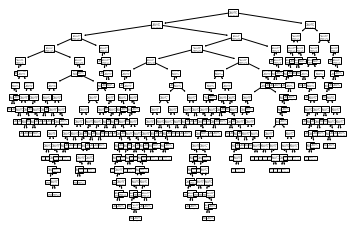

In [40]:
>>> from sklearn import tree
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, y)
clf.predict([[6., 6.,6.,6.,6.,6.]])
tree.plot_tree(clf) 